
# Exploratory Data Analysis Notebook #2 (Intermediate) in progress

Time to go a little more in depth for the results of the research paper, representing some of the main points and some of the points we're interested in figuring out from the data; namely climbing peak force vs grade, critical force in terms of body mass and peak force against grade, and how CF (the isometric version) of CP (isotonic, forearm and shoulder engagement) is measured against work capacity (W')


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataframe = pd.read_csv('Climbing Critical Force Data - Giles et al 2020.csv')
dataframe = dataframe.dropna(axis=1, how='all')
dataframe = dataframe.dropna(axis=0, how='all')

In [4]:
dataframe.head()

,#,SEX,AGE (YRS),HEIGHT (CM),BODY MASS (KG),YRS CLIMBING,CLIMB HRS WEEK,TRAIN HRS WEEK,SPORT GRADE IRCRA,BOULDER GRADE IRCRA,# REPS,PEAK FORCE (KG),PEAK FORCE % BODY MASS,CF (KG),CF % PEAK FORCE,CF % BODY MASS,40% MVC (KG),W' (KG),W' PER KG BODY MASS
0,0.0,Female,38.0,164.0,56.5,10.0,3.0,0.0,NaN,19.0,24.0,33.28,58.9%,12.85,38.6%,22.7%,9.98,579.31,10.25
1,1.0,Female,28.0,157.5,56.1,13.0,14.0,4.0,NaN,21.5,24.0,42.01,74.9%,13.52,32.2%,24.1%,16.80,1088.38,19.40
2,2.0,Female,26.0,159.0,51.8,2.0,5.0,0.8,NaN,17.0,24.0,39.73,76.7%,11.08,27.9%,21.4%,15.89,884.00,17.06
3,3.0,Female,26.0,169.0,56.3,8.0,6.0,2.0,15.0,19.0,24.0,33.31,59.2%,7.84,23.5%,13.9%,13.32,463.40,8.23
4,4.0,Female,22.0,173.5,71.8,8.0,9.0,2.0,NaN,20.5,24.0,50.55,70.4%,16.84,33.3%,23.5%,20.22,968.50,13.49


In [5]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
#,121.0,80.388430,56.117789,0.00,38.00,74.00,105.00,202.00
AGE (YRS),120.0,31.625000,8.548490,18.00,26.00,31.00,35.25,57.00
HEIGHT (CM),119.0,171.463025,8.922794,153.00,165.00,171.50,177.85,193.40
BODY MASS (KG),121.0,66.507438,10.278060,46.60,58.00,65.00,74.20,91.20
YRS CLIMBING,114.0,8.268421,7.440006,0.00,3.00,6.00,11.00,40.00
CLIMB HRS WEEK,111.0,8.300901,6.176282,2.00,6.00,7.00,9.00,56.00
TRAIN HRS WEEK,105.0,3.037143,4.250345,0.00,0.50,2.00,4.00,30.00
SPORT GRADE IRCRA,80.0,19.075000,3.121080,13.00,17.00,19.00,21.00,28.00
BOULDER GRADE IRCRA,72.0,20.381944,2.392025,16.50,19.00,20.00,21.00,27.00
# REPS,121.0,26.280992,2.924674,24.00,24.00,24.00,30.00,30.00


## Further Grade Breakdowns

I thought it'd be interesting to convert the IRCRA grades to scales that me and many other North American based climbers would be more familiar with; mainly the V-Scale for bouldering and the Yosemite Decimal System for Sport/Roped Climbing. 

I utilized data from [Comparative grading scales, statistical analyses, climber descriptors and ability
grouping: International Rock Climbing Research Association Position Statement](https://core.ac.uk/download/pdf/77059908.pdf) and based my measurements off of their analysis.

## Converting IRCRA bouldering grades into V-scale.

Following their IRCRA reporting and Vermin Scale (V-Scale) reporting, I binned the IRCRA grades into V grades, and did an overall count to report the numbers. 


In [6]:
v_bins = [16,17,18,19,20,22,23,24,27]
v_bin_labels = ['V2','V3','V4','V5','V6','V7','V8','V9+']

In [7]:
v_bin = pd.cut(dataframe['BOULDER GRADE IRCRA'],bins=v_bins,labels = v_bin_labels).value_counts().sort_index(ascending=False).to_frame()
v_bin.sort_index(ascending=True)

,BOULDER GRADE IRCRA
V2,8
V3,4
V4,14
V5,12
V6,21
V7,5
V8,1
V9+,7



It seems like the majority of our climbers are within the v4-v6 range!

Text(0, 0.5, 'V scale')

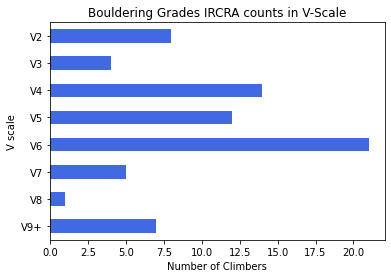

In [8]:
v_bin.plot(kind='barh',color='royalblue',legend=False)
plt.style.use('seaborn') 
plt.title('Bouldering Grades IRCRA counts in V-Scale')
plt.xlabel('Number of Climbers')
plt.ylabel('V scale')

## Converting IRCRA sport grades into Yosemite Decimal Systems scale

Same technique as stated above, this time for measuring sport grade counts. 
There was a large amount of climbers primarily in the 5.11a-5.12d ranges, so I further divided these columns to help readability.


In [9]:
y_bins = [12,14,15.5,17,19.5,22,25,26,29]
y_bin_labels = ['5.10c-5.10d','5.11a-5.11b','5.11b-5.11d','5.12a-5.12b','5.12b-5.12d','5.13a-5.13d','5.14a-5.14d','5.14+']

In [10]:
y_bin = pd.cut(dataframe['SPORT GRADE IRCRA'],bins=y_bins,labels=y_bin_labels).value_counts().sort_index(ascending=False)
y_bin.sort_index(ascending=True)
# bins=v_bins,labels = v_bin_labels).value_counts().sort_index(ascending=False).to_frame()

5.10c-5.10d     3
5.11a-5.11b     5
5.11b-5.11d    24
5.12a-5.12b    13
5.12b-5.12d    24
5.13a-5.13d     8
5.14a-5.14d     1
5.14+           2
Name: SPORT GRADE IRCRA, dtype: int64

76% of our climbers are located within the 5'11a-5'12d range! 

In [ ]:
y_bin.plot(kind='barh',color='darkgreen',legend=False)
plt.style.use('seaborn') 
plt.title('Sport Grades IRCRA counts in Yosemite')
plt.xlabel('Number of Climbers')
plt.ylabel('Yosemite Decimal scale')

## Training Hours per Week vs Climbing Grade (Sport, Bouldering)

Ah, the age old question of if more training makes you a better climber; and we are members of the team behind 'climbing fun, training bad.' Unfortunately the graph does show that the majority of the climbers who climb above 24 (v8+) for bouldering do end up training more than three hours weekly. 

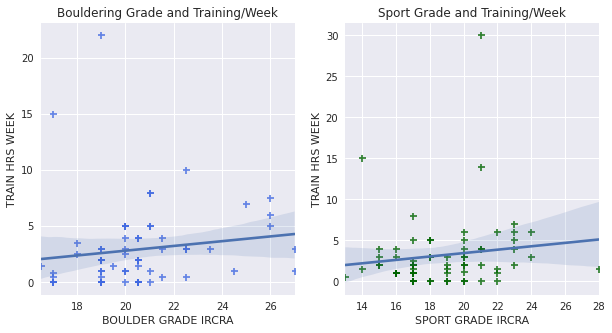

In [31]:
# Subplot our graphs, to have bouldering and sport side by side.
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10 , 5),)

# Use the function regplot to make a scatterplot for Bouldering Grades
ax1 = sns.regplot(ax= ax1,x=dataframe["BOULDER GRADE IRCRA"], y=dataframe["TRAIN HRS WEEK"], marker='+', scatter_kws={"color":"royalblue"})
ax1.title.set_text('Bouldering Grade and Training/Week')

# Use the function regplot to make a scatterplot for Sport Grades
ax2 = sns.regplot(ax= ax2, x=dataframe["SPORT GRADE IRCRA"], y=dataframe["TRAIN HRS WEEK"], marker='+', scatter_kws={"color":"darkgreen"})
ax2.title.set_text('Sport Grade and Training/Week')



## Grades and Peak Force Relationships

As we are of the camp that technique can compensate for some strength, this was one of the more interesting relationships we wanted to further look into; does the "pull hard don't let go" motto have any significance in our data? 


Kind of? In our bouldering boxplots, the medians steadily increased as we got further up in grades aside from a couple of outliers (what happened 21.5?) So we can draw some relationship in determining how much of an affect there is between the two!

In terms of Sport Grade however, it seemed to be very steady across the board, with the medians jumping by leaps of 5 or less. It's a relatively interesting and pretty understandable difference between the two; sport being more of a stamina and long term focused climbing discipline vs the short impact and very power dependant discipline that is bouldering!



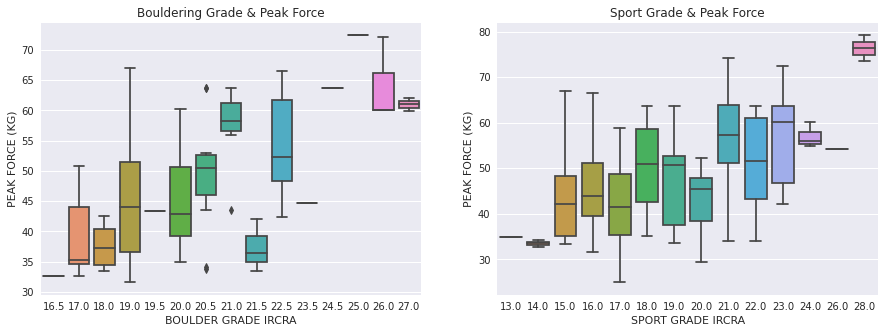

In [35]:
fig, (ax3,ax4) = plt.subplots(1, 2, figsize=(15 , 5),)

ax3= sns.boxplot(ax = ax3, data = dataframe, x="BOULDER GRADE IRCRA", y="PEAK FORCE (KG)")
ax3.title.set_text('Bouldering Grade & Peak Force')

ax4= sns.boxplot(ax = ax4, data = dataframe, x="SPORT GRADE IRCRA", y="PEAK FORCE (KG)")
ax4.title.set_text('Sport Grade & Peak Force')


### Is there a correlation with weight and grade?


#weight vs grade?
maybe divide into quartiles or something? they use linreg for this already so maybe do something different

In [14]:
#yrs climbing, age, cf 

### cf % body mass, cf% peak force vs grade lineplot/jointplot?




<AxesSubplot:xlabel='BOULDER GRADE IRCRA', ylabel='CF % PEAK FORCE'>

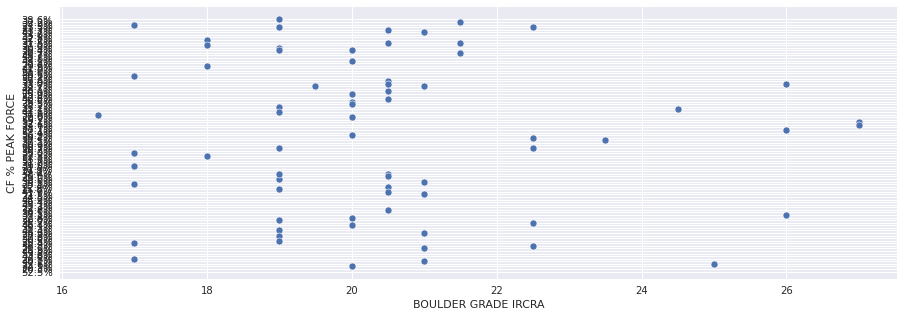

In [41]:
fig, ax5 = plt.subplots(figsize=(15 , 5),)

# sns.scatterplot(ax=ax5, data = dataframe, x="BOULDER GRADE IRCRA", y="PEAK FORCE (KG)")
# sns.scatterplot(ax=ax5, data = dataframe, x="SPORT GRADE IRCRA", y="PEAK FORCE (KG)").set(title='asfasdas',xlabel="assssss")

#PAIN
sns.scatterplot(ax=ax5, data = dataframe, x="BOULDER GRADE IRCRA", y="CF % PEAK FORCE")
# sns.scatterplot(ax=ax5, data = dataframe, x="CF % BODY MASS", y="BOULDER GRADE IRCRA").set(title='asfasdas',xlabel="assssss")


# title.set_text('Bouldering Grade & Peak Force')

# sns.catplot(data = dataframe, x="")
# sns.catplot(data = dataframe, )
# ax6= sns.boxplot(ax = ax6, data = dataframe, x="SPORT GRADE IRCRA", y="PEAK FORCE (KG)")
# ax6.title.set_text('Sport Grade & Peak Force')

In [15]:
#critical force body mass vs critical force in c
# omparison to grades?
#can i get both of these things in one chart?




### cf and work capacity (w')

In [16]:
#critical force and work capacity is the biggest thing (w')
#don't use a linechart /linreg for it, as they've done it with paper, maybe try another approach?
#facetgrid? 